### Project 1
### Credit Score Classification Model Development

1.1 Installing and loading required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
df=pd.read_csv("credit.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [5]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

 No missing values present

In [6]:
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
def find_outliers_z_score(data):
    threshold = 3
    mean = data.mean()
    std = data.std()
    z_scores = (data - mean) / std
    return data[abs(z_scores) > threshold]

In [8]:
columns_list = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']

In [9]:
for column in columns_list:
    if df[column].dtype in ['int64', 'float64']:  # Checking for numerical columns
        outliers = find_outliers_z_score(df[column])
        if not outliers.empty:
            print(f"Outliers in {column}:")
            print(outliers)


Outliers in Annual_Income:
1728     173196.32
1729     173196.32
1730     173196.32
1731     173196.32
1732     173196.32
           ...    
98931    175718.64
98932    175718.64
98933    175718.64
98934    175718.64
98935    175718.64
Name: Annual_Income, Length: 1088, dtype: float64
Outliers in Monthly_Inhand_Salary:
1728     14258.026667
1729     14258.026667
1730     14258.026667
1731     14258.026667
1732     14258.026667
             ...     
98931    14707.220000
98932    14707.220000
98933    14707.220000
98934    14707.220000
98935    14707.220000
Name: Monthly_Inhand_Salary, Length: 1055, dtype: float64
Outliers in Outstanding_Debt:
584      4984.82
585      4984.82
586      4984.82
587      4984.82
588      4984.82
          ...   
97795    4936.34
97796    4936.34
97797    4936.34
97798    4936.34
97799    4936.34
Name: Outstanding_Debt, Length: 584, dtype: float64
Outliers in Credit_Utilization_Ratio:
2547     47.969560
3094     47.927665
5291     48.247003
9382     50.000

No substantial outlier present when analysing the above output with domain knowledge

1.2. Removing duplicate data

In [10]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


Since values in columns are not uniform we infer that the data shall not be removed and might be necessry for creating the classification model

# 2. Exploratory Data Analysis

In [11]:
df.shape

(100000, 28)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [13]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


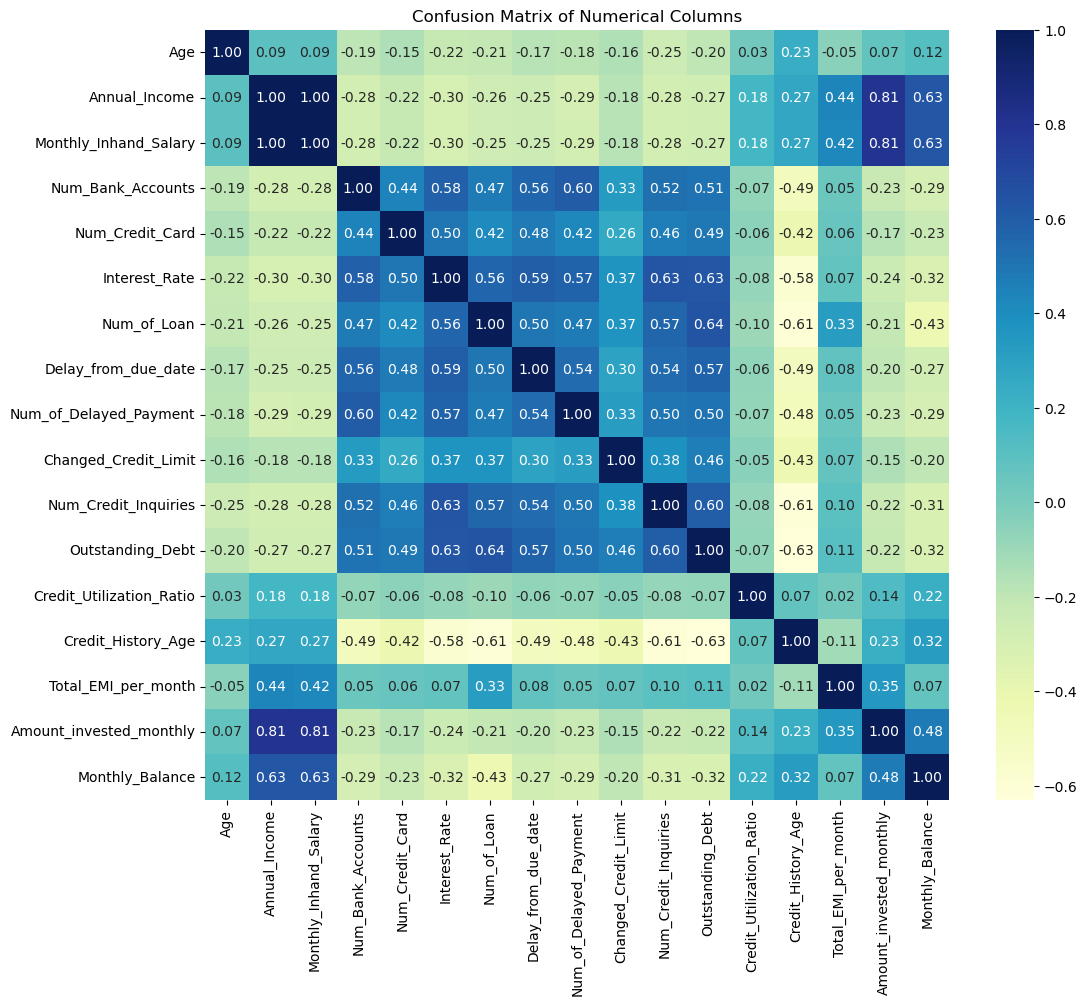

In [14]:
# Confusion matrix
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Confusion Matrix of Numerical Columns")
plt.show()


here -1 describe negative correlation (ie inversly proportional) and +1 shows positive correlation (ie. directly proportional)

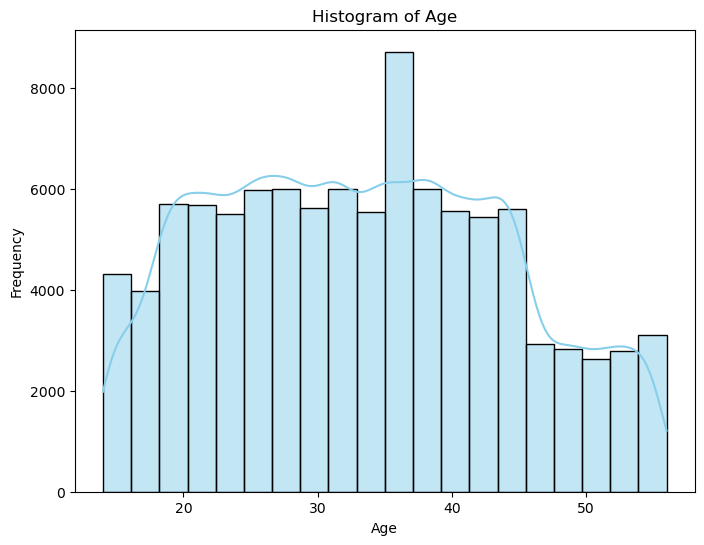

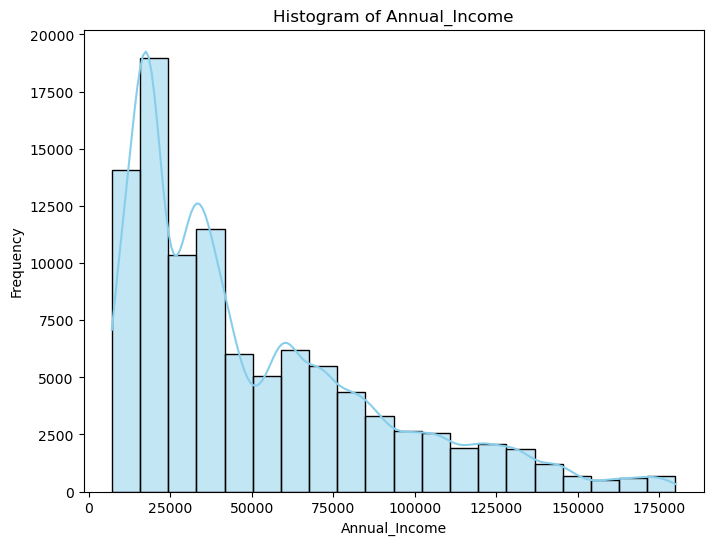

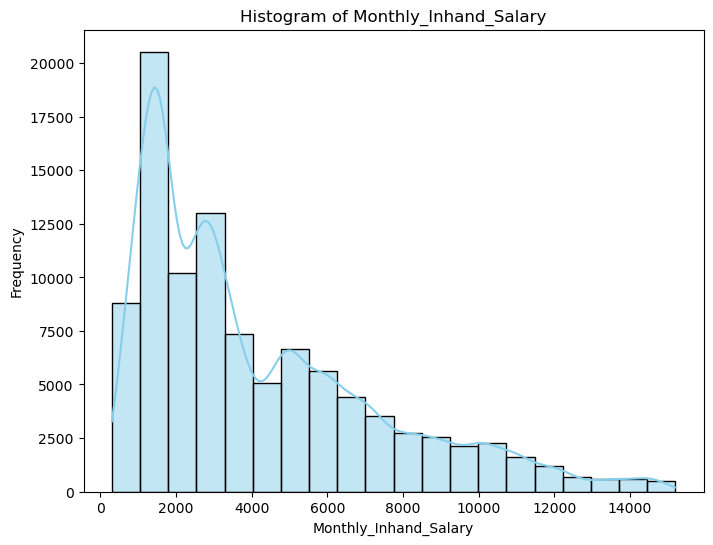

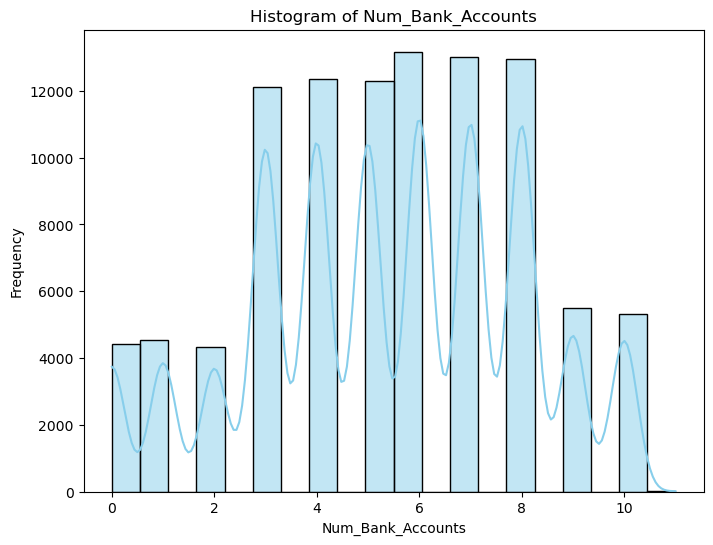

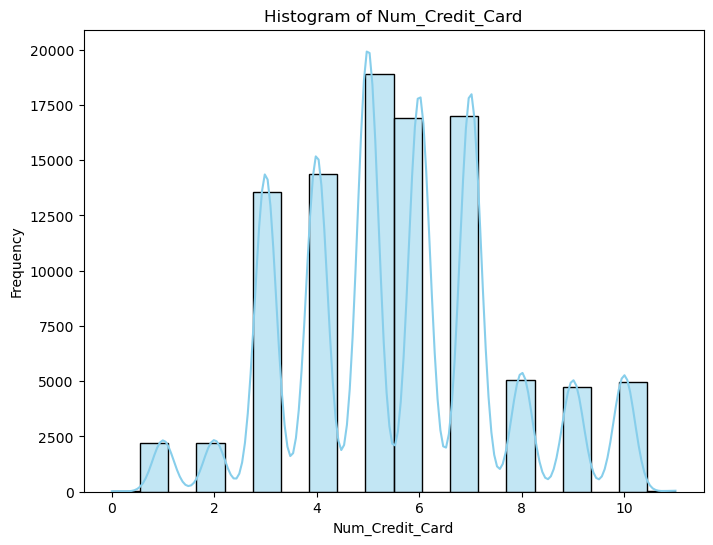

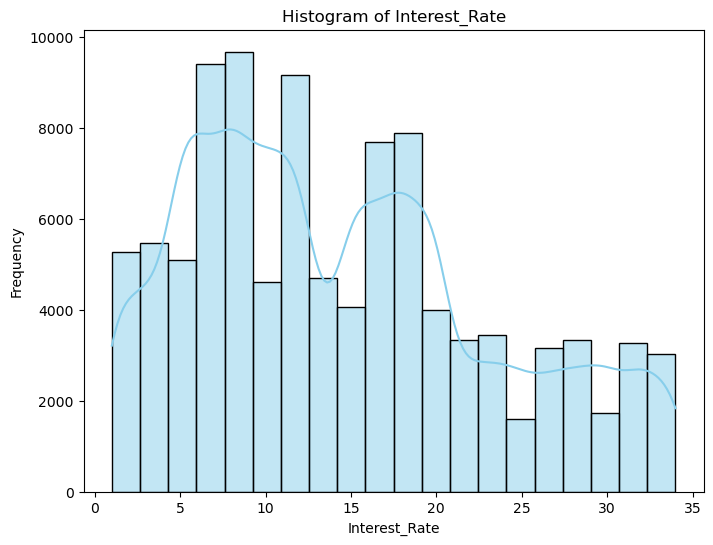

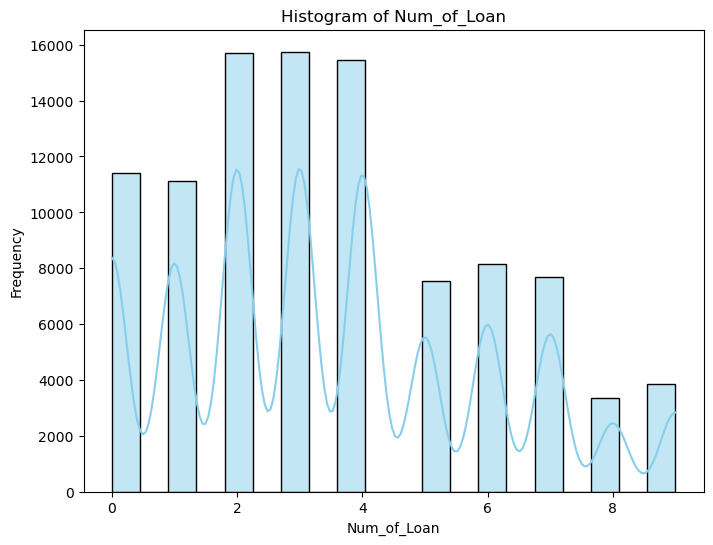

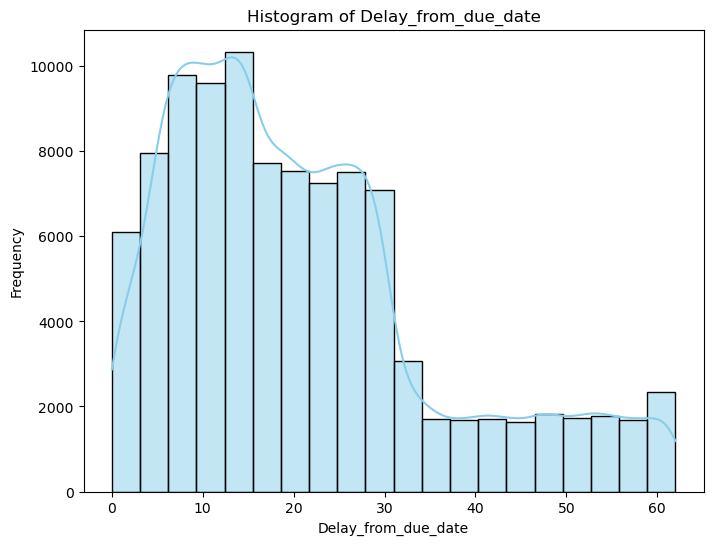

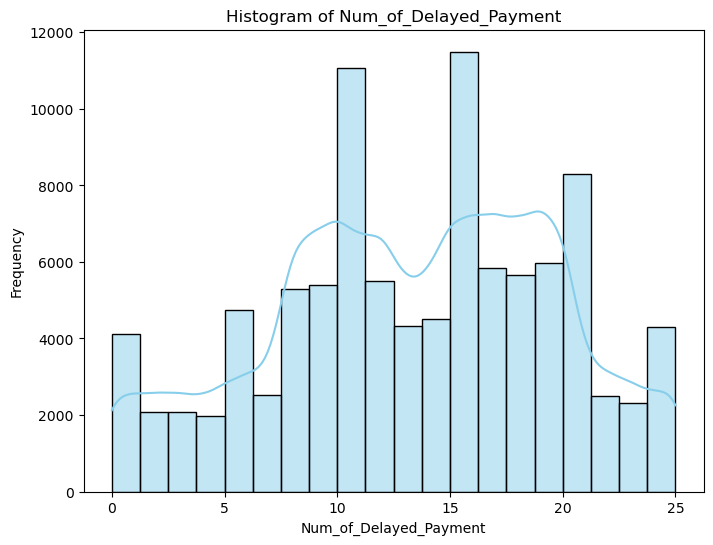

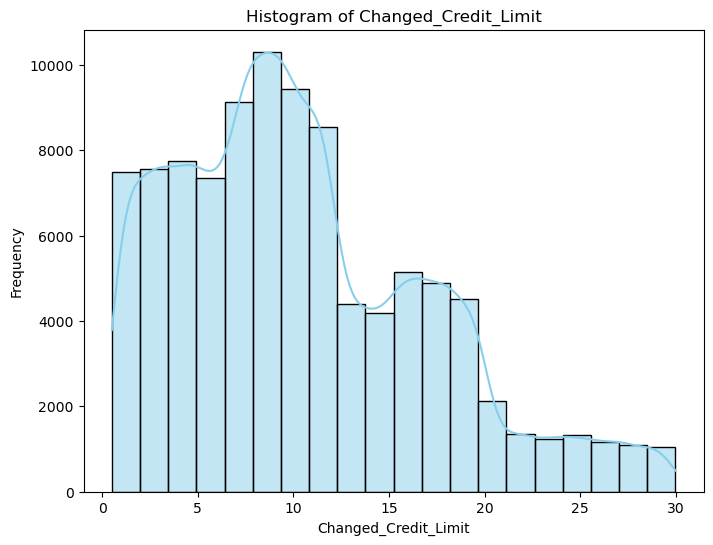

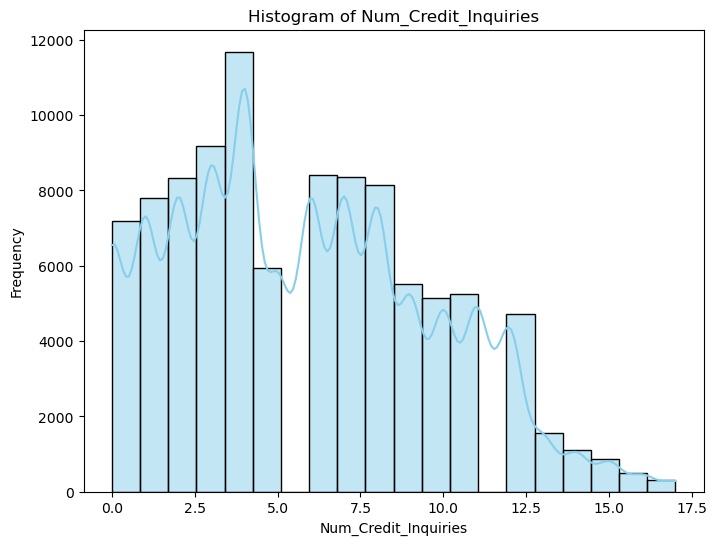

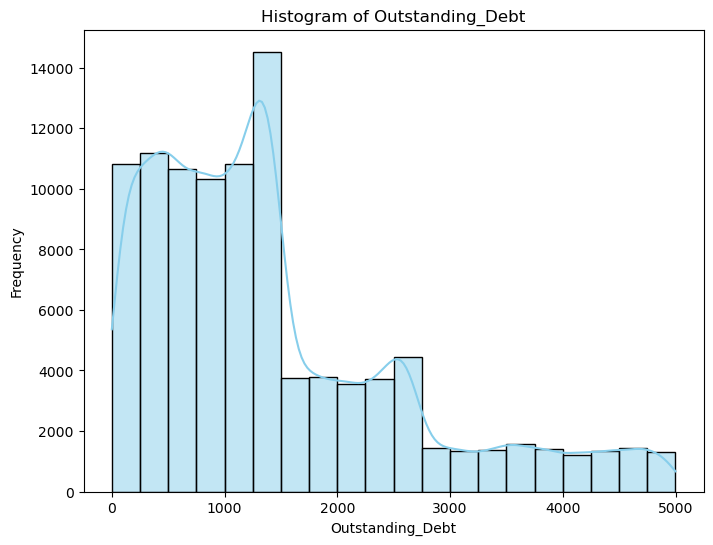

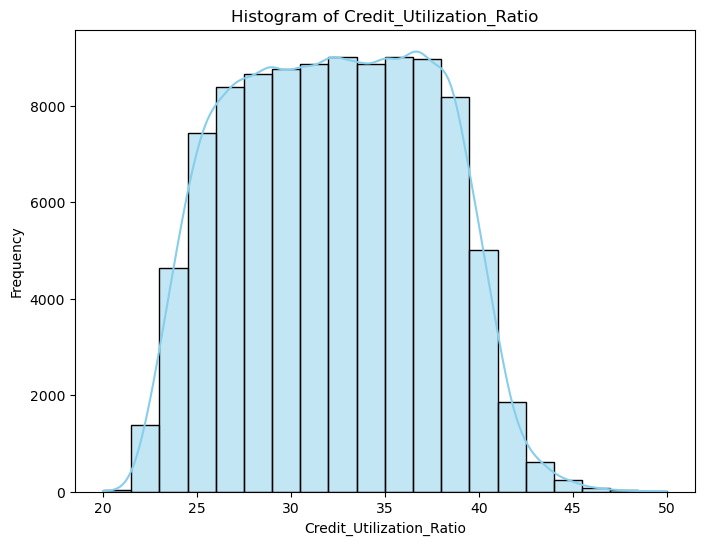

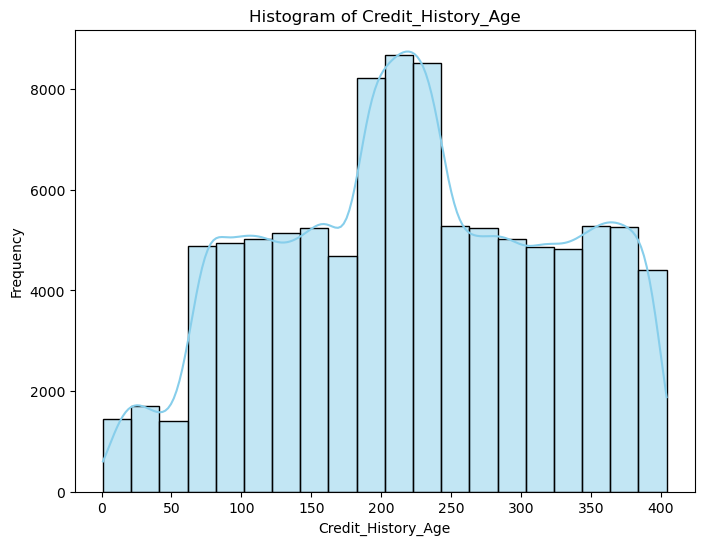

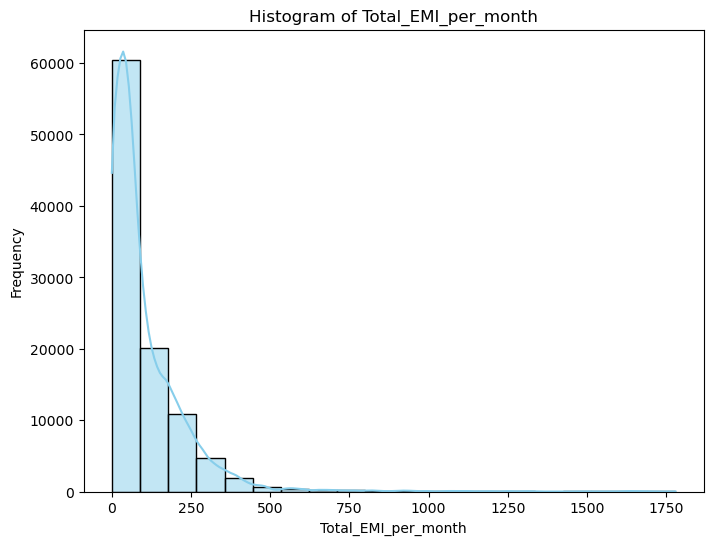

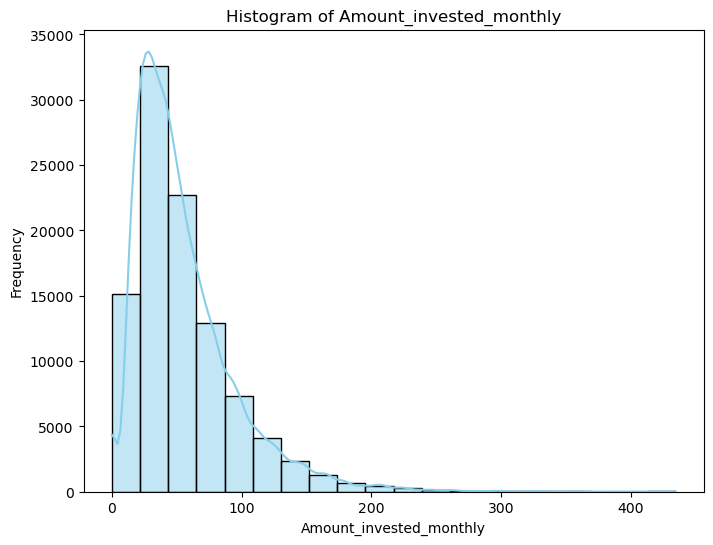

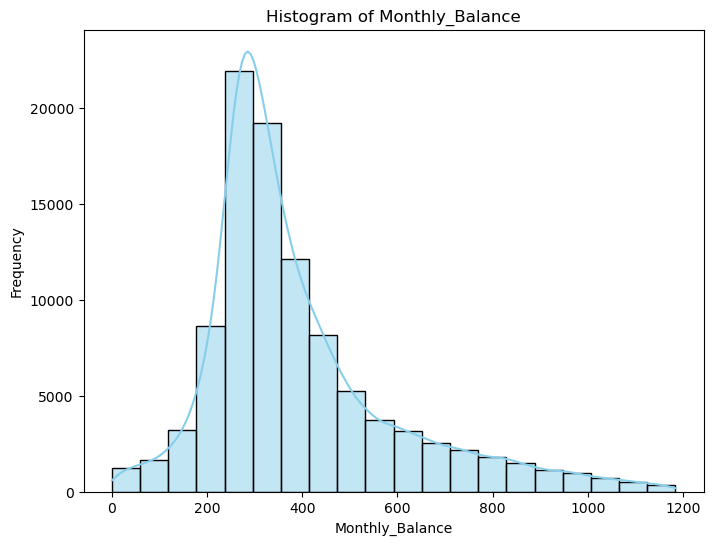

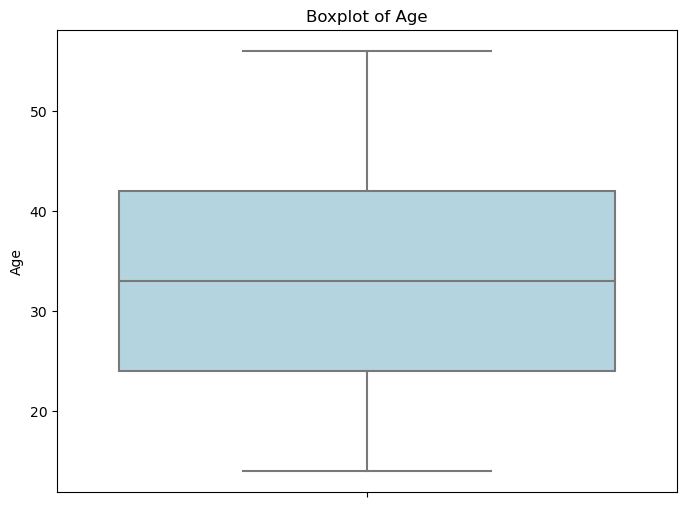

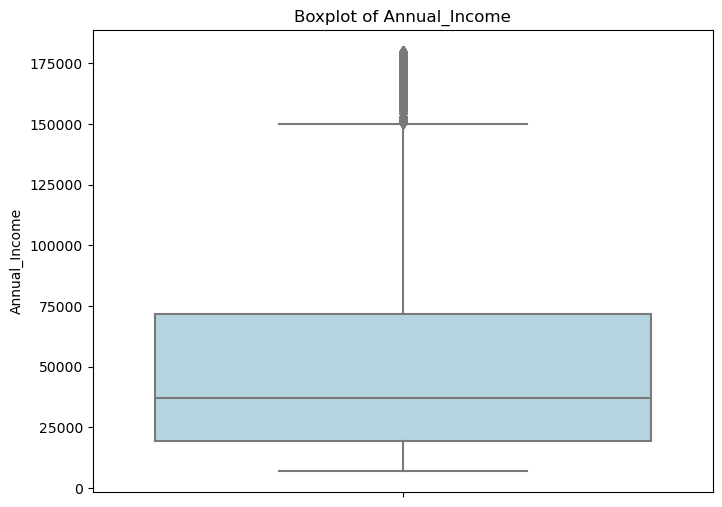

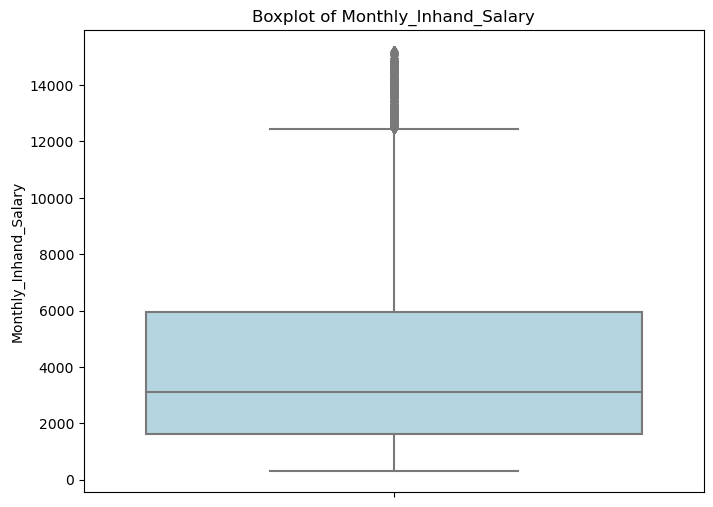

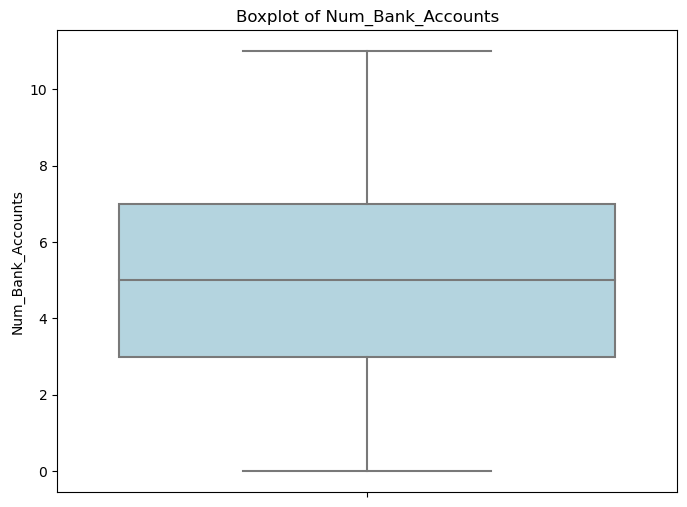

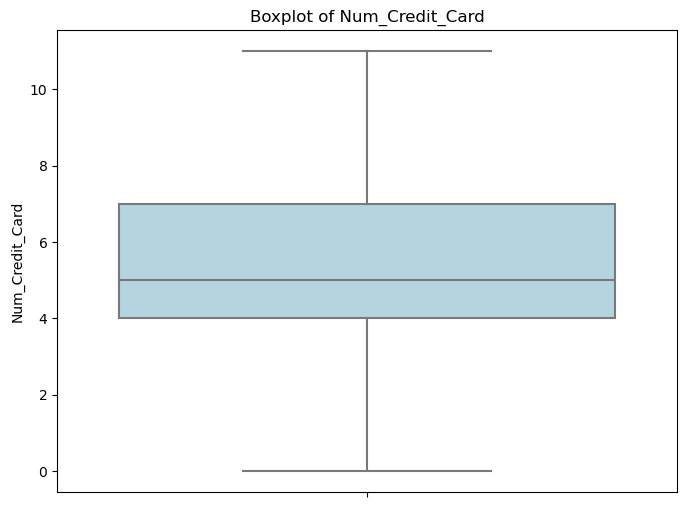

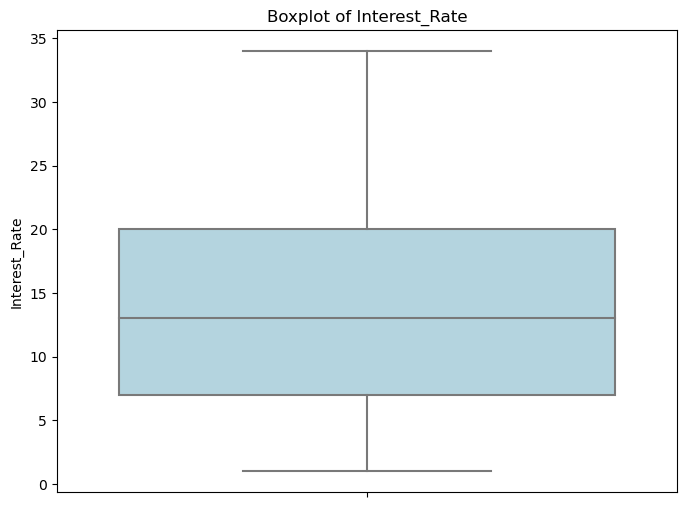

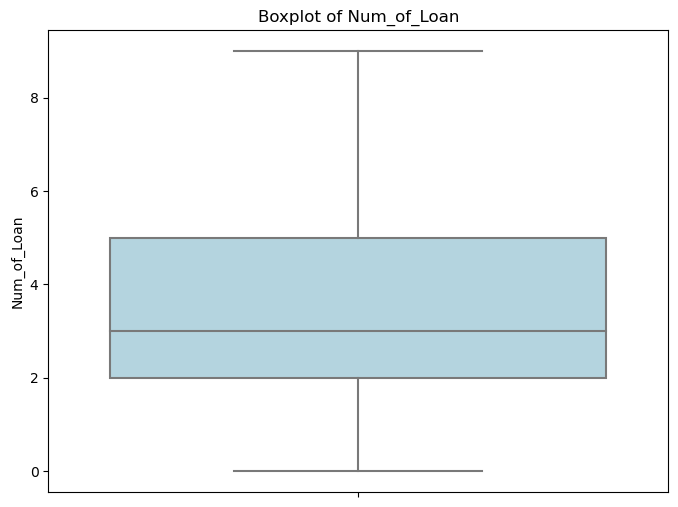

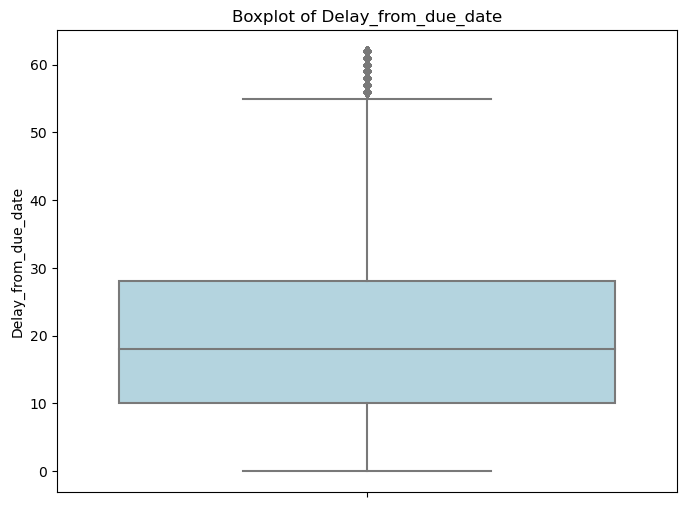

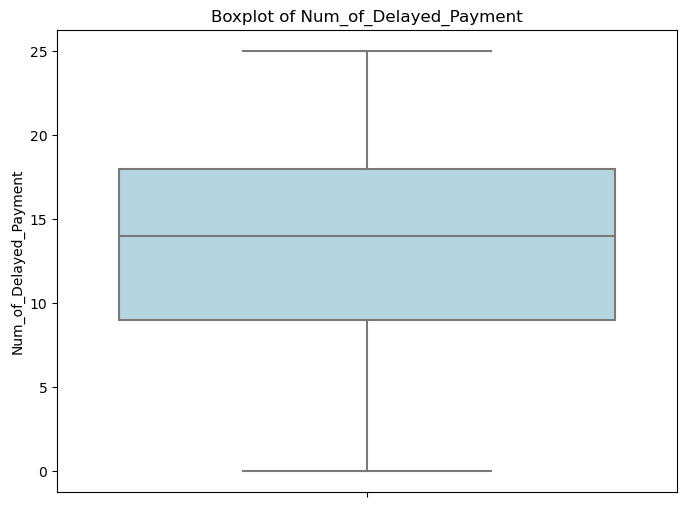

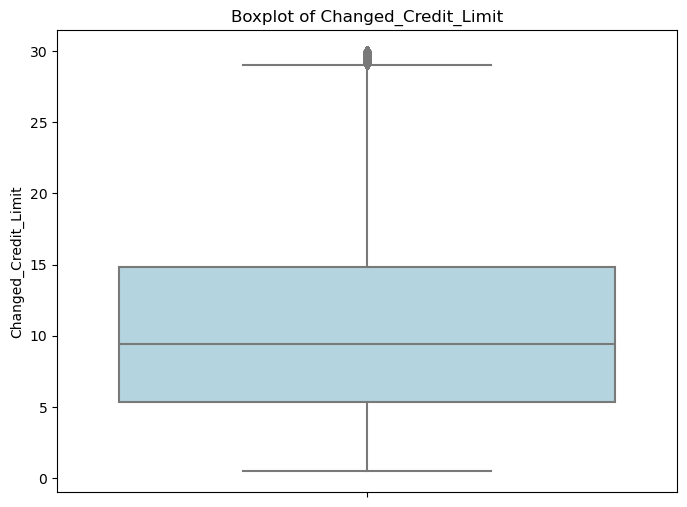

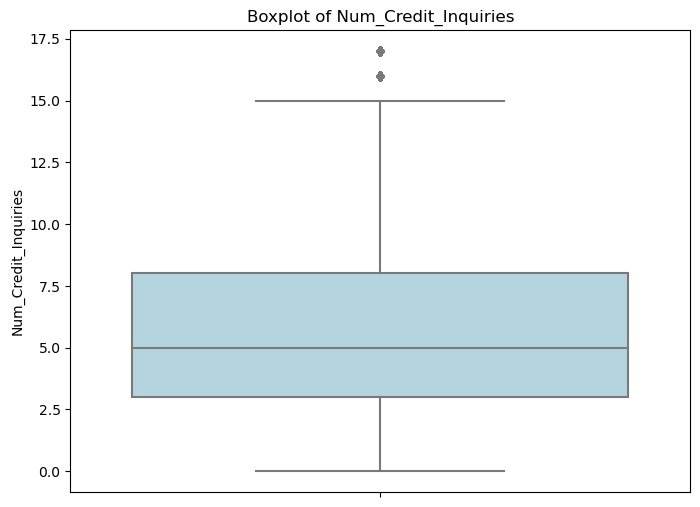

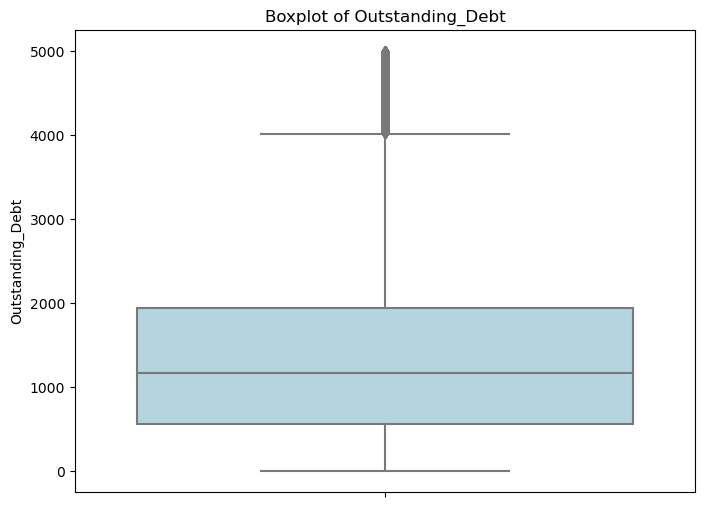

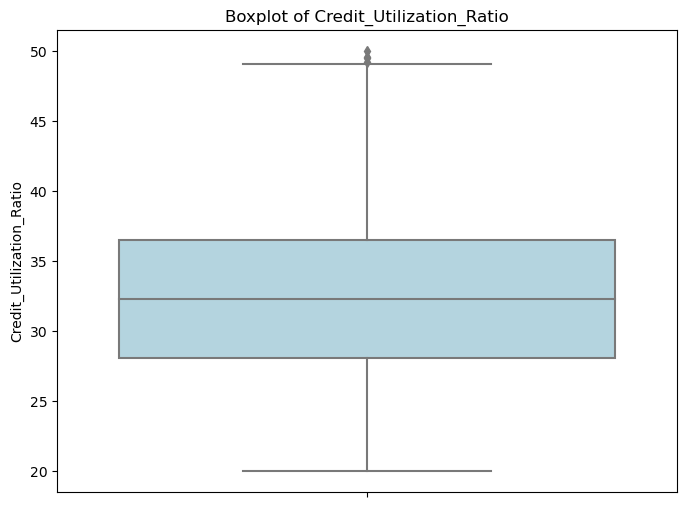

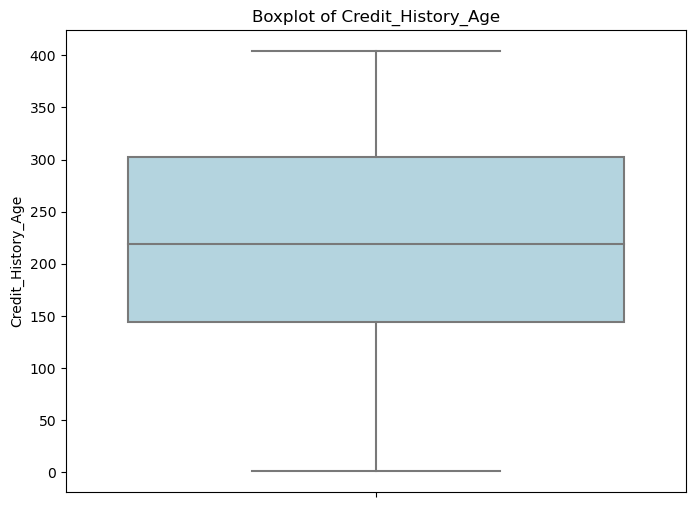

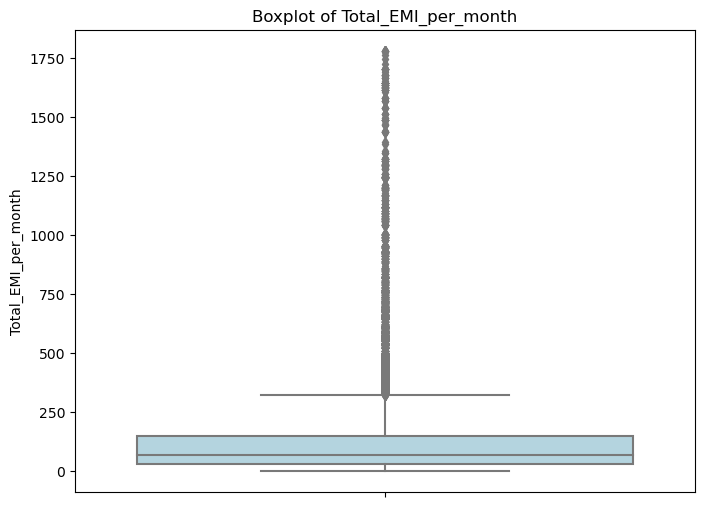

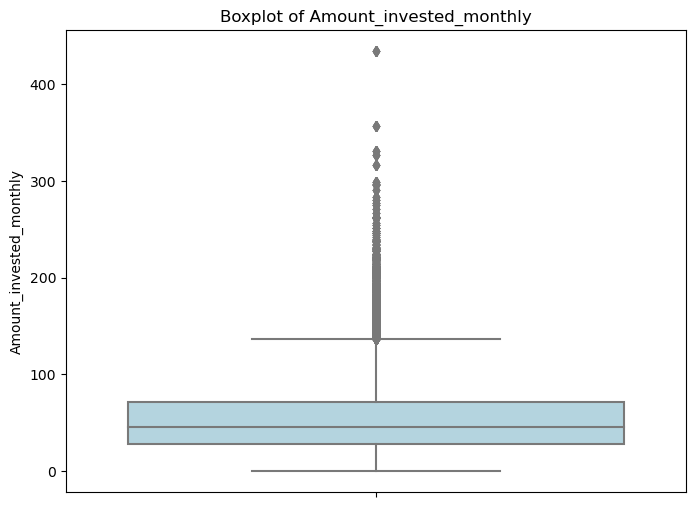

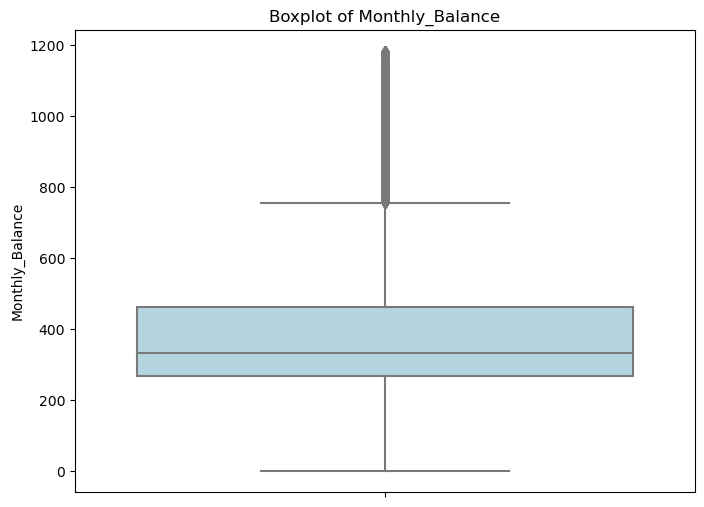

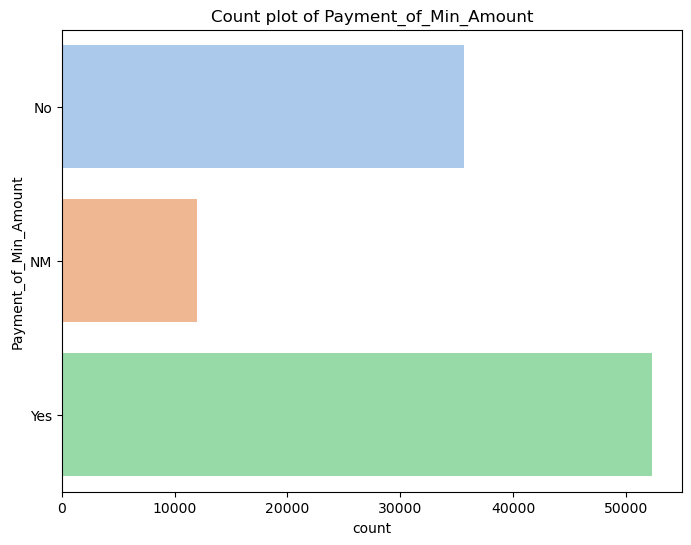

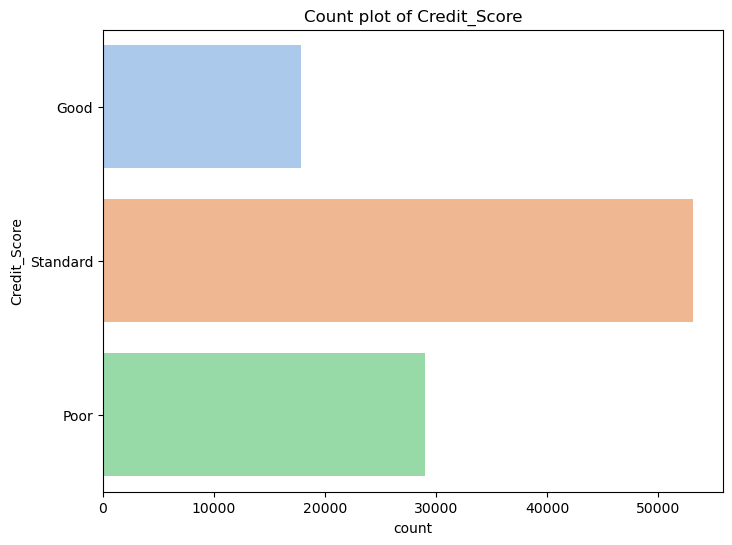

In [15]:
columns_to_explore = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']


for column in columns_to_explore:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, bins=20, color='skyblue')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

for column in columns_to_explore:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[column], color='lightblue')
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()


for column in columns_to_explore:
    if df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(y=column, data=df, palette='pastel')
        plt.title(f'Count plot of {column}')
        plt.ylabel(column)
        plt.show()

Credit_score = Standard covers the majority of the cases, followed by Poor and Good

# 3. Data pre-processing

In [16]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


Using encoder to convert text values to numerical values and mapping the previous and latest values

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [18]:
df1=df.drop(['ID','Customer_ID','Name','SSN'],axis=1)

In [19]:
df1

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [20]:
df2=df1.drop('Month',axis=1)

In [21]:
col1=df2.columns

In [22]:
col1

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [23]:
# Label Encoding
object_columns1 = df2.select_dtypes(include=['object']).columns
object_columns1


Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [24]:
df2['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [25]:
df2['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [26]:
df2['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
..

In [27]:
#One- hot encoding
oh=['Occupation','Payment_Behaviour']


In [28]:
df_en = pd.get_dummies(df2, columns=oh)

In [29]:
df_en.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       

In [30]:
df_en.shape

(100000, 42)

In [ ]:
df_le=

In [31]:
# Label Encoding with value mapping

columns_to_encode=['Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Credit_Score']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()


for column in columns_to_encode:
    df_en[column + '_encoded'] = label_encoder.fit_transform(df_en[column])


mapping_output = {}
for column in columns_to_encode:
    le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    mapping_output[column] = le_name_mapping

for column, mapping in mapping_output.items():
    print(f"Mapping for {column}: {mapping}")

print(df_en.head())

Mapping for Type_of_Loan: {'Good': 0, 'Poor': 1, 'Standard': 2}
Mapping for Credit_Mix: {'Good': 0, 'Poor': 1, 'Standard': 2}
Mapping for Payment_of_Min_Amount: {'Good': 0, 'Poor': 1, 'Standard': 2}
Mapping for Credit_Score: {'Good': 0, 'Poor': 1, 'Standard': 2}
    Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0              4.0            3.0          4.0   
1              4.0            3.0          4.0   
2              4.0            3.0          4.0   
3              4.0            3.0          4.0   
4              4.0            3.0          4.0   

                           

In [34]:
df_en

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,...,0,0,1,0,0,0,128,1,1,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,...,0,0,0,1,0,0,128,1,1,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,...,0,0,0,0,1,0,128,1,1,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,...,0,0,0,0,0,1,128,1,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,...,0,1,0,0,0,0,128,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,...,1,0,0,0,0,0,683,1,1,1
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,...,0,1,0,0,0,0,683,1,1,1
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,...,1,0,0,0,0,0,683,1,1,1
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,...,0,0,0,1,0,0,683,1,1,2


In [35]:
df_en.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       

In [36]:
df_check=df_en.select_dtypes(include=['object']).columns
df_check

Index(['Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'], dtype='object')

In [37]:
df_en=df_en.drop(['Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Credit_Score'],axis=1)

# 4. Feature Engineering

In [38]:

month=df1['Month']

In [39]:
df_en1 = pd.concat([df_en, month], axis=1)

In [40]:
df_en1

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded,Month
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,0,0,128,1,1,0,1
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,0,0,1,0,0,128,1,1,0,2
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,0,1,0,128,1,1,0,3
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,0,0,1,128,1,1,0,4
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,1,0,0,0,0,128,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,0,0,0,0,683,1,1,1,4
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,1,0,0,0,0,683,1,1,1,5
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,0,0,0,0,683,1,1,1,6
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0,0,1,0,0,683,1,1,2,7


In [41]:
def map_to_quarters(month_num):
    quarter_map = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 4, 11: 4, 12: 4}
    return quarter_map[month_num]


df_en1['Quarter'] = df_en1['Month'].apply(map_to_quarters)

In [42]:
df_en1

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded,Month,Quarter
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1,0,0,0,128,1,1,0,1,1
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,0,1,0,0,128,1,1,0,2,1
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,1,0,128,1,1,0,3,1
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,0,1,128,1,1,0,4,2
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,0,0,0,128,1,1,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,0,0,0,683,1,1,1,4,2
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0,0,0,0,683,1,1,1,5,2
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,0,0,0,683,1,1,1,6,2
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0,1,0,0,683,1,1,2,7,3


In [43]:
df['Month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [44]:
df_en1=df_en1.drop('Month',axis=1)

In [45]:

col2=['Quarter']
df_en2 = pd.get_dummies(df_en1, columns=col2)

In [46]:
df_en2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded,Quarter_1,Quarter_2,Quarter_3
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,0,128,1,1,0,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,1,0,0,128,1,1,0,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,128,1,1,0,1,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,1,128,1,1,0,0,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,0,0,128,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,1,0,0,683,1,1,2,0,0,1


# 5. Split to train and test sets

In [47]:
X=df_en2.drop('Credit_Score_encoded',axis=1)
y=df_en2['Credit_Score_encoded']

In [48]:
X

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Quarter_1,Quarter_2,Quarter_3
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1,0,0,0,128,1,1,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,0,1,0,0,128,1,1,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,1,0,128,1,1,1,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,0,1,128,1,1,0,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,0,0,0,128,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,0,0,0,683,1,1,0,1,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0,0,0,0,683,1,1,0,1,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,0,0,0,683,1,1,0,1,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0,1,0,0,683,1,1,0,0,1


In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Score_encoded, Length: 100000, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  6. Applying ML algorithms

6.1 Logistic Regression

In [53]:
model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

Accuracy of the logistic regression model: 0.54


C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


6.2 Decision tree classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy of the decision tree classifier: {accuracy:.2f}")

Accuracy of the decision tree classifier: 0.75


In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 3676   194  1452]
 [  198  6451  2156]
 [ 1416  2036 12421]]


6.3 Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


rf=model.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy of the random forest classifier: {accuracy:.2f}")

Accuracy of the random forest classifier: 0.83


In [57]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 4221    29  1072]
 [   59  7500  1246]
 [  950  1660 13263]]


6.4 XGBoost

In [58]:
#!pip install xgboost


In [59]:
from xgboost import XGBClassifier

In [60]:
model=XGBClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the XGBoost classifier: {accuracy:.2f}")

Accuracy of the XGBoost classifier: 0.78


In [61]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 4020    65  1237]
 [  243  6789  1773]
 [ 1294  1877 12702]]


# 6.1  Testing accuracy using scaling

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [63]:
df_en2.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_sp

In [64]:
cols2scale=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Type_of_Loan_encoded', 'Credit_Mix_encoded',
       'Payment_of_Min_Amount_encoded','Quarter_1',
       'Quarter_2', 'Quarter_3']

In [65]:
df_en2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded,Quarter_1,Quarter_2,Quarter_3
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,0,128,1,1,0,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,1,0,0,128,1,1,0,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,128,1,1,0,1,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,1,128,1,1,0,0,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,0,0,128,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,1,0,0,683,1,1,2,0,0,1


In [66]:
df_Scaled=df_en2.copy()

In [67]:
df_Scaled[cols2scale] = scaler.fit_transform(df_Scaled[cols2scale])

In [68]:
df_en2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded,Quarter_1,Quarter_2,Quarter_3
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,0,128,1,1,0,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,1,0,0,128,1,1,0,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,128,1,1,0,1,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,1,128,1,1,0,0,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,0,0,128,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,0,0,683,1,1,1,0,1,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,1,0,0,683,1,1,2,0,0,1


In [69]:
df_Scaled

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Credit_Score_encoded,Quarter_1,Quarter_2,Quarter_3
0,0.214286,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,0.048387,0.28,0.365332,...,0.0,0.0,0.0,0.020447,0.5,0.5,0,1.0,0.0,0.0
1,0.214286,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,0.048387,0.16,0.365332,...,1.0,0.0,0.0,0.020447,0.5,0.5,0,1.0,0.0,0.0
2,0.214286,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,0.048387,0.28,0.365332,...,0.0,1.0,0.0,0.020447,0.5,0.5,0,1.0,0.0,0.0
3,0.214286,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,0.080645,0.16,0.195726,...,0.0,0.0,1.0,0.020447,0.5,0.5,0,0.0,1.0,0.0
4,0.214286,0.069997,0.102087,0.272727,0.363636,0.060606,0.444444,0.096774,0.16,0.365332,...,0.0,0.0,0.0,0.020447,0.5,0.5,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.261905,0.188593,0.205072,0.363636,0.545455,0.181818,0.222222,0.370968,0.28,0.373134,...,0.0,0.0,0.0,0.109105,0.5,0.5,1,0.0,1.0,0.0
99996,0.261905,0.188593,0.205072,0.363636,0.545455,0.181818,0.222222,0.290323,0.28,0.373134,...,0.0,0.0,0.0,0.109105,0.5,0.5,1,0.0,1.0,0.0
99997,0.261905,0.188593,0.205072,0.363636,0.545455,0.181818,0.222222,0.435484,0.24,0.373134,...,0.0,0.0,0.0,0.109105,0.5,0.5,1,0.0,1.0,0.0
99998,0.261905,0.188593,0.205072,0.363636,0.545455,0.181818,0.222222,0.322581,0.24,0.373134,...,1.0,0.0,0.0,0.109105,0.5,0.5,2,0.0,0.0,1.0


In [70]:
X1=df_Scaled.drop('Credit_Score_encoded',axis=1)
y1=df_Scaled['Credit_Score_encoded']

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


In [72]:
# Logistic regression

model = LogisticRegression()


model.fit(X1_train, y1_train)


y1_pred = model.predict(X1_test)


accuracy = accuracy_score(y1_test, y1_pred)


print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

Accuracy of the logistic regression model: 0.65


C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))

Confusion Matrix:
 [[ 2878    67  2377]
 [  445  4672  3688]
 [ 1722  2279 11872]]


# No improvement in result with scaling. KNN and SVM abruplty stopped execution hence skipping those

applying values in randomforest

In [74]:
df_en2.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_sp

# 6.2 Trying output for real input values

In [75]:
cols=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Type_of_Loan_encoded', 'Credit_Mix_encoded',
       'Payment_of_Min_Amount_encoded', 'Credit_Score_encoded', 'Quarter_1',
       'Quarter_2', 'Quarter_3']

In [76]:
first_row = df_en2.iloc[0]
print(first_row)

Age                                                      23.000000
Annual_Income                                         19114.120000
Monthly_Inhand_Salary                                  1824.843333
Num_Bank_Accounts                                         3.000000
Num_Credit_Card                                           4.000000
Interest_Rate                                             3.000000
Num_of_Loan                                               4.000000
Delay_from_due_date                                       3.000000
Num_of_Delayed_Payment                                    7.000000
Changed_Credit_Limit                                     11.270000
Num_Credit_Inquiries                                      4.000000
Outstanding_Debt                                        809.980000
Credit_Utilization_Ratio                                 26.822620
Credit_History_Age                                      265.000000
Total_EMI_per_month                                      49.57

In [77]:
 #'Credit_Score_encoded': 2, 

In [78]:
data = {
    'Age': [23.0],
    'Annual_Income': [19114.12],
    'Monthly_Inhand_Salary': [1824.843333],
    'Num_Bank_Accounts': [3.0],
    'Num_Credit_Card': [4.0],
    'Interest_Rate': [3.0],
    'Num_of_Loan': [4.0],
    'Delay_from_due_date': [3.0],
    'Num_of_Delayed_Payment': [7.0],
    'Changed_Credit_Limit': [11.27],
    'Num_Credit_Inquiries': [4.0],
    'Outstanding_Debt': [809.98],
    'Credit_Utilization_Ratio': [26.82262],
    'Credit_History_Age': [265.0],
    'Total_EMI_per_month': [49.574949],
    'Amount_invested_monthly': [21.46538],
    'Monthly_Balance': [312.494089],
    'Occupation_Accountant': [False],
    'Occupation_Architect': [False],
    'Occupation_Developer': [False],
    'Occupation_Doctor': [False],
    'Occupation_Engineer': [False],
    'Occupation_Entrepreneur': [False],
    'Occupation_Journalist': [False],
    'Occupation_Lawyer': [False],
    'Occupation_Manager': [False],
    'Occupation_Mechanic': [False],
    'Occupation_Media_Manager': [False],
    'Occupation_Musician': [False],
    'Occupation_Scientist': [True],
    'Occupation_Teacher': [False],
    'Occupation_Writer': [False],
    'Payment_Behaviour_High_spent_Large_value_payments': [False],
    'Payment_Behaviour_High_spent_Medium_value_payments': [False],
    'Payment_Behaviour_High_spent_Small_value_payments': [True],
    'Payment_Behaviour_Low_spent_Large_value_payments': [False],
    'Payment_Behaviour_Low_spent_Medium_value_payments': [False],
    'Payment_Behaviour_Low_spent_Small_value_payments': [False],
    'Type_of_Loan_encoded': [128],
    'Credit_Mix_encoded': [1],
    'Payment_of_Min_Amount_encoded': [1],
    'Quarter_1': [True],
    'Quarter_2': [False],
    'Quarter_3': [False]
}

# Creating a DataFrame from the dictionary
input_data = pd.DataFrame(data, index=[0])










In [79]:
#X_new = df[cols]

# Make predictions using the Random Forest model
predictions = rf.predict(input_data)

# Print the output predictions
print(predictions)

[0]


got correct prediction for input values


# 7. Hyperparameter tuning

Grid search cv

In [80]:
'''from sklearn.model_selection import GridSearchCV

SyntaxError: incomplete input (990244567.py, line 1)

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from datetime import datetime
from joblib import parallel_backend

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the reduced hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with cross-validation and display the remaining time
start_time = datetime.now()
with parallel_backend('threading', n_jobs=-1):
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
    grid_search.fit(X_train, y_train)
end_time = datetime.now()

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Calculate and display the total time taken for the grid search
time_taken = end_time - start_time
print(f"Total Time Taken: {time_taken}")


 Xg boost hyperparameter tuning

In [ ]:
'''import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform Grid Search with cross-validation and display the remaining time
start_time = datetime.now()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
end_time = datetime.now()

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Calculate and display the total time taken for the grid search
time_taken = end_time - start_time
print(f"Total Time Taken: {time_taken}")


# 7.2 Trying Feature Reduction

In [ ]:
df_reduced=df_en2.copy()

In [ ]:
df_reduced

In [ ]:
df_reduced.columns

In [ ]:
df_reduced.drop(['Quarter_1', 'Quarter_2', 'Quarter_3'], axis=1, inplace=True)


In [ ]:
df_reduced.columns

In [ ]:
df_reduced

In [ ]:
X2=df_reduced.drop('Credit_Score_encoded',axis=1)
y2=df_reduced['Credit_Score_encoded']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


In [ ]:

model = RandomForestClassifier()


rf1=model.fit(X2_train, y2_train)


y2_pred = rf1.predict(X2_test)


accuracy = accuracy_score(y2_test, y2_pred)


print(f"Accuracy of the random forest classifier: {accuracy:.2f}")

In [ ]:
.purposeful error

In [ ]:
# Confusion matrix
numerical_columns1 = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Type_of_Loan_encoded', 'Credit_Mix_encoded',
       'Payment_of_Min_Amount_encoded', 'Credit_Score_encoded']

# Creating the correlation matrix
corr_matrix = df_reduced[numerical_columns1].corr()

# Generating a heatmap to visualize the confusion matrix
plt.figure(figsize=(60, 50))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Confusion Matrix of Numerical Columns")
plt.show()


In [ ]:
correlation_matrix = df_reduced.corr()

# Find columns with correlation greater than 0.7
high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)


print(high_correlation)

In [ ]:
df_reduced.drop(['Amount_invested_monthly', 'Monthly_Inhand_Salary'], axis=1, inplace=True)


In [ ]:
X2=df_reduced.drop('Credit_Score_encoded',axis=1)
y2=df_reduced['Credit_Score_encoded']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


In [ ]:
import matplotlib.pyplot as plt


target_counts = df_reduced['Credit_Score_encoded'].value_counts()
labels = target_counts.index
sizes = target_counts.values


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Target Classes')
plt.show()


In [ ]:

model = RandomForestClassifier()


rf1=model.fit(X2_train, y2_train)


y2_pred = rf1.predict(X2_test)


accuracy = accuracy_score(y2_test, y2_pred)

print(f"Accuracy of the random forest classifier: {accuracy:.2f}")

Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from joblib import parallel_backend

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the reduced hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with cross-validation and display the remaining time
start_time = datetime.now()
with parallel_backend('threading', n_jobs=-1):
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
    grid_search.fit(X2_train, y2_train)
end_time = datetime.now()

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Calculate and display the total time taken for the grid search
time_taken = end_time - start_time
print(f"Total Time Taken: {time_taken}")


In [82]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the reduced hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search with cross-validation and display the remaining time
start_time = datetime.now()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)
end_time = datetime.now()

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Calculate and display the total time taken for the grid search
time_taken = end_time - start_time
print(f"Total Time Taken: {time_taken}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  49.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  44.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.5min
[CV] END ma

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  37.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  37.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  36.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  36.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  37.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total tim

Best Parameters 0: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best Score: 0.8208

Best Parameters 1: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300} '\n'

Best Score: 0.8040428571428573

Randomnized search cv

In [84]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': [None] + list(sp_randint(5, 20).rvs(5)),  # Reduced the number of samples
    'min_samples_split': sp_randint(2, 10),
    'min_samples_leaf': sp_randint(1, 4),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Perform Randomized Search with cross-validation
start_time = time.time()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)  # Reduced the number of iterations
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print(f"Time taken: {end_time - start_time} seconds")


KeyboardInterrupt: 

# 8  Cross validation

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with the best parameters obtained from the Randomized Search or Grid Search
best_params = grid_search.best_params_  # Replace with your actual best parameters
rf_best = RandomForestClassifier(**best_params)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.82357143 0.82478571 0.81914286 0.81657143 0.82007143]
Mean Cross-Validation Score: 0.8208285714285715


# 9  Model interoperability

Feature ranking:
1. feature 11 - Outstanding_Debt (0.09209518247991255)
2. feature 5 - Interest_Rate (0.07398508965666857)
3. feature 39 - Credit_Mix_encoded (0.06735619212702404)
4. feature 13 - Credit_History_Age (0.06006469386270075)
5. feature 7 - Delay_from_due_date (0.05721075250100559)
6. feature 9 - Changed_Credit_Limit (0.05255733725497459)
7. feature 16 - Monthly_Balance (0.041783976197108365)
8. feature 4 - Num_Credit_Card (0.04033191205485345)
9. feature 12 - Credit_Utilization_Ratio (0.03974534472750982)
10. feature 10 - Num_Credit_Inquiries (0.03809558904902511)
11. feature 8 - Num_of_Delayed_Payment (0.038090083803974766)
12. feature 14 - Total_EMI_per_month (0.037674615844905855)
13. feature 1 - Annual_Income (0.03646955643660048)
14. feature 15 - Amount_invested_monthly (0.03638246135544745)
15. feature 2 - Monthly_Inhand_Salary (0.03616973765854933)
16. feature 38 - Type_of_Loan_encoded (0.032983545972029654)
17. feature 0 - Age (0.032840109969975745)
18. feature 3 - 

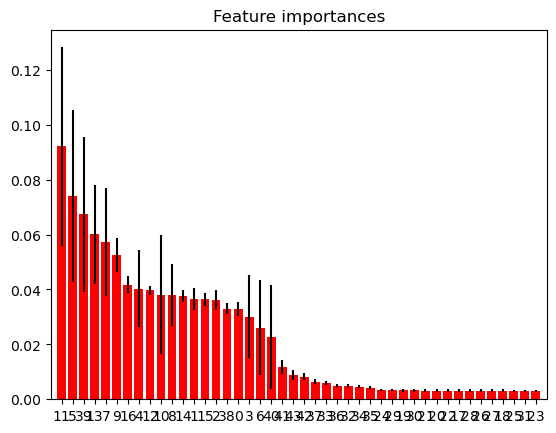

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the Random Forest model on the entire training data
rf_best.fit(X_train, y_train)

# Extract feature importances
importances = rf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_best.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} - {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# 10  Perfomance validation

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing dataset
y_pred = rf_best.predict(X_test)

# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')
#roc_auc = roc_auc_score(y2_test, y2_pred,multi_class='ovr')

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.8350333333333333
Precision: 0.8350333333333333
Recall: 0.8350333333333333
F1 Score: 0.8350333333333333


In [89]:
# Obtain predicted probabilities for each class
y_pred_proba = rf_best.predict_proba(X_test)

# Calculate the ROC AUC score for a multiclass classification task
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9386957803369637


In [90]:
y_test

75721    0
80184    1
19864    0
76699    1
92991    0
        ..
42648    2
86306    2
45466    1
63724    1
34122    1
Name: Credit_Score_encoded, Length: 30000, dtype: int32

In [91]:
y_prob

NameError: name 'y_prob' is not defined

In [92]:
data = pd.Series(y_test, dtype='int32')

# Convert the Series to a list
y_test1 = data.tolist()

# Print the list
print(y_test1)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 

# 11  Threshhold selection

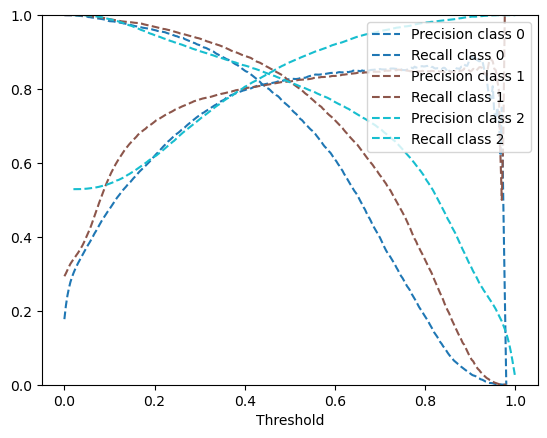

In [94]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Get predicted probabilities for each class
y_probs = rf_best.predict_proba(X_test)

# Create a colormap
colors = cycle(plt.cm.tab10(np.linspace(0, 1, 3)))  # Adjust the number of classes here

# Calculate precision-recall curve for each class
for i, color in zip(range(3), colors):  # Assuming 3 classes, adjust this according to the number of classes in your problem
    precision, recall, thresholds = precision_recall_curve((y_test == i).astype(int), y_probs[:, i])
    plt.plot(thresholds, precision[:-1], linestyle='--', color=color, label=f"Precision class {i}")
    plt.plot(thresholds, recall[:-1], linestyle='--', color=color, label=f"Recall class {i}")

plt.xlabel("Threshold")
plt.legend(loc="upper right")
plt.ylim([0, 1])
plt.show()


#  12  Model extraction & deployment in flask

In [95]:
import pickle as pkl

In [97]:
with open('rf_credit_Score.pkl', 'wb') as model_file:
    pkl.dump(rf_best, model_file)

In [98]:
X.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_sp

In [99]:
X.shape

(100000, 44)

In [100]:
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Type_of_Loan_encoded,Credit_Mix_encoded,Payment_of_Min_Amount_encoded,Quarter_1,Quarter_2,Quarter_3
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1,0,0,0,128,1,1,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,0,1,0,0,128,1,1,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,0,1,0,128,1,1,1,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,0,0,1,128,1,1,0,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,0,0,0,128,1,1,0,1,0


In [101]:
X.iloc[0]

Age                                                      23.000000
Annual_Income                                         19114.120000
Monthly_Inhand_Salary                                  1824.843333
Num_Bank_Accounts                                         3.000000
Num_Credit_Card                                           4.000000
Interest_Rate                                             3.000000
Num_of_Loan                                               4.000000
Delay_from_due_date                                       3.000000
Num_of_Delayed_Payment                                    7.000000
Changed_Credit_Limit                                     11.270000
Num_Credit_Inquiries                                      4.000000
Outstanding_Debt                                        809.980000
Credit_Utilization_Ratio                                 26.822620
Credit_History_Age                                      265.000000
Total_EMI_per_month                                      49.57

In [102]:
y.head(1)

0    0
Name: Credit_Score_encoded, dtype: int32

In [103]:
import flask

In [106]:
!pip install pipreqs


  Using cached pipreqs-0.4.13-py2.py3-none-any.whl (33 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=76d1785f95cbc0901fca299cb6b7205ff4cebd38c5d3b567144dc9ef83de6281
  Stored in directory: c:\users\prasa\appdata\local\pip\cache\wheels\1a\b0\8c\4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [108]:
!pipreqs

INFO: Successfully saved requirements file in C:\Users\prasa\OneDrive\Desktop\ICTAK INTERNSHIP\requirements.txt


In [109]:
import pkg_resources

# Get a list of all installed packages
installed_packages = pkg_resources.working_set

# Extract package names and versions
package_info = [(package.project_name, package.version) for package in installed_packages]

# Display the list
package_info


[('Automat', '20.2.0'),
 ('Babel', '2.11.0'),
 ('Bottleneck', '1.3.5'),
 ('Flask', '2.2.2'),
 ('HeapDict', '1.0.1'),
 ('Jinja2', '3.1.2'),
 ('Markdown', '3.4.1'),
 ('MarkupSafe', '2.1.1'),
 ('Pillow', '9.4.0'),
 ('Protego', '0.1.16'),
 ('PyDispatcher', '2.0.5'),
 ('PyJWT', '2.4.0'),
 ('PyNaCl', '1.5.0'),
 ('PyQt5', '5.15.7'),
 ('PyQt5-sip', '12.11.0'),
 ('PyQtWebEngine', '5.15.4'),
 ('PySocks', '1.7.1'),
 ('PyWavelets', '1.4.1'),
 ('PyYAML', '6.0'),
 ('Pygments', '2.15.1'),
 ('QDarkStyle', '3.0.2'),
 ('QtAwesome', '1.2.2'),
 ('QtPy', '2.2.0'),
 ('Rtree', '1.0.1'),
 ('SQLAlchemy', '1.4.39'),
 ('Scrapy', '2.8.0'),
 ('Send2Trash', '1.8.0'),
 ('Sphinx', '5.0.2'),
 ('TBB', '0.2'),
 ('Twisted', '22.10.0'),
 ('Unidecode', '1.2.0'),
 ('Werkzeug', '2.2.3'),
 ('absl-py', '2.0.0'),
 ('aiobotocore', '2.5.0'),
 ('aiofiles', '22.1.0'),
 ('aiohttp', '3.8.5'),
 ('aioitertools', '0.7.1'),
 ('aiosignal', '1.2.0'),
 ('aiosqlite', '0.18.0'),
 ('alabaster', '0.7.12'),
 ('anaconda-anon-usage', '0.4.2'),
 ('

In [110]:
!pip install bz2file

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6889 sha256=b6aaf922770abfcb20c0688a24aa516c7741934c8b06f42ad09d74cc195870ab
  Stored in directory: c:\users\prasa\appdata\local\pip\cache\wheels\f8\dc\a2\d5648eee379349a57b03ccf386862f09826575087464f070b2
Successfully built bz2file


In [111]:
import bz2file as bz2